# Brain Tumor Classification (MRI)

In [7]:
import numpy as np
import os
import pandas as pd
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## Load Data

### Load images from file

The initial dimensions of the images vary, so we needed to resize the images to 360 by 380 when loading them to make the pca work. 

In [8]:
def load_images(path):
    dirs = ['Training', 'Testing']
    images = []
    labels = []
    category_samples = {}
    for dir in dirs:
        path2 = os.path.join(path, dir)
        for label in os.listdir(path2):
            label_path = os.path.join(path2, label)
            if os.path.isdir(label_path):
                for img_name in os.listdir(label_path):
                    img_path = os.path.join(label_path, img_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img_resized = cv2.resize(img, (360, 380))
                    images.append(img_resized)
                    labels.append(label)
                    if label not in category_samples:
                        category_samples[label] = img_resized
    


    images_flattened = [img.flatten() for img in images]
    print('number of images: ', len(images_flattened))

    return images_flattened, labels, category_samples


In [9]:
images_flattened, labels, category_samples = load_images('data')

number of images:  3264


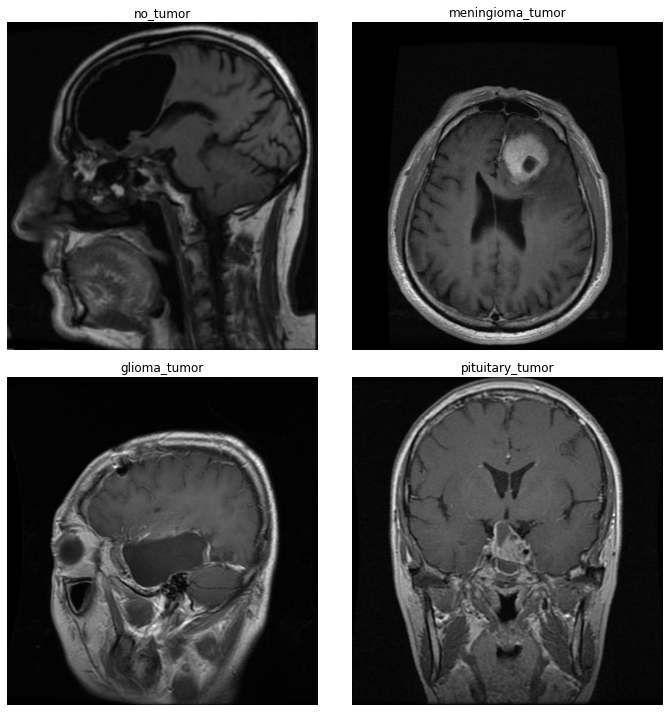

In [10]:
def plot_sample_images(category_samples):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for ax, (label, img) in zip(axes.flatten(), category_samples.items()):
        ax.imshow(img, cmap='gray')
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(category_samples)

### PCA

In [11]:
pca = PCA(n_components=128)
images_reduced = pca.fit_transform(images_flattened)

### Create training/validation/test split

- using 80/10/10 split

In [12]:
# Split data into training (80%) and a temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(images_reduced, labels, test_size=0.2, random_state=42)

# Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Build Classifiers

### SVM

In [13]:
default_svm = SVC()
default_svm.fit(X_train, y_train)
trn_acc_default_svm = default_svm.score(X_train, y_train)
tst_acc_default_svm = default_svm.score(X_test, y_test)
val_acc_default_svm = default_svm.score(X_val, y_val)

y_pred_default_svm = default_svm.predict(X_test)
cm_default_svm = confusion_matrix(y_test, y_pred_default_svm)
print(cm_default_svm)

f1_score_default_svm = f1_score(y_test, y_pred_default_svm, average='weighted')
precision_score_default_svm = precision_score(y_test, y_pred_default_svm, average='weighted')
recall_score_default_svm = recall_score(y_test, y_pred_default_svm, average='weighted')

print('F1 score of default SVM: ', f1_score_default_svm)
print('Precision score of default SVM: ', precision_score_default_svm)
print('Recall score of default SVM: ', recall_score_default_svm)


print('Training accuracy of default SVM: ', trn_acc_default_svm)
print('Test accuracy of default SVM: ', tst_acc_default_svm)
print('Validation accuracy of default SVM: ', val_acc_default_svm)

[[75 14  3  0]
 [11 73  2  5]
 [ 3  6 50  2]
 [ 2  0  0 81]]
F1 score of default SVM:  0.8527038032068022
Precision score of default SVM:  0.853536868741071
Recall score of default SVM:  0.8532110091743119
Training accuracy of default SVM:  0.9157410953657602
Test accuracy of default SVM:  0.8532110091743119
Validation accuracy of default SVM:  0.8466257668711656


### Logistic Regression

#### Scikit Learn Logistic Regression

In [14]:
default_logistic = LogisticRegression()
default_logistic.fit(X_train, y_train)
trn_acc_default_logistic = default_logistic.score(X_train, y_train)
tst_acc_default_logistic = default_logistic.score(X_test, y_test)
val_acc_default_logistic = default_logistic.score(X_val, y_val)

y_pred_default_logistic = default_logistic.predict(X_test)
cm_default_logistic = confusion_matrix(y_test, y_pred_default_logistic)
print(cm_default_logistic)

f1_score_default_logistic = f1_score(y_test, y_pred_default_logistic, average='weighted')
precision_score_default_logistic = precision_score(y_test, y_pred_default_logistic, average='weighted')
recall_score_default_logistic = recall_score(y_test, y_pred_default_logistic, average='weighted')

print('F1 score of default Logistic Regression: ', f1_score_default_logistic)
print('Precision score of default Logistic Regression: ', precision_score_default_logistic)
print('Recall score of default Logistic Regression: ', recall_score_default_logistic)


print('Training accuracy of default Logistic Regression: ', trn_acc_default_logistic)
print('Test accuracy of default Logistic Regression: ', tst_acc_default_logistic)
print('Validation accuracy of default Logistic Regression: ', val_acc_default_logistic)

[[66 14 10  2]
 [27 45  9 10]
 [ 7 12 34  8]
 [ 3  0  1 79]]
F1 score of default Logistic Regression:  0.6757094461920948
Precision score of default Logistic Regression:  0.6766582363560808
Recall score of default Logistic Regression:  0.6850152905198776
Training accuracy of default Logistic Regression:  0.7640750670241286
Test accuracy of default Logistic Regression:  0.6850152905198776
Validation accuracy of default Logistic Regression:  0.6901840490797546


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression from scratch

In [15]:
from tqdm import tqdm

def softmax(z): # p(y=1|x, w)
    z_exp = np.exp(z - np.max(z, axis=1, keepdims=True))  
    # Subtract the maximum value in each row. prevents nan values since data is not normalized
    # z_exp = np.exp(z)
    return z_exp / np.sum(z_exp, axis=1, keepdims=True)


def loss(y, y_pred):
    return - np.sum(y*np.log(y_pred + 1e-9)) / y.shape[0]

def gradient(X, y, y_pred):
    return np.dot(X.T, y_pred - y) / X.shape[0]


def train_model(X, y, J, lr=0.01, epochs=100, lr_decay=1, lbd=0): 
    w = np.random.randn(X.shape[1]+1, J) # initialize weights using random normal distribution. last weight is bias term
    # convert y to one-hot encoding
    y_onehot = np.zeros((y.shape[0], J))
    y_onehot[np.arange(y.shape[0]), y] = 1

    # add bias term
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    losses = []
    
    for epoch in tqdm(range(epochs)):
        y_pred = softmax(np.dot(X, w))
        g = gradient(X, y_onehot, y_pred)
        # add lbd * w to gradient
        g += lbd * w
        # implement learning rate decay
        lr = lr * lr_decay
        w -= lr * g

        losses.append(loss(y_onehot, y_pred))
    return w, losses


def predict(X, w):
    # add bias term to X
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_pred = np.argmax(softmax(np.dot(X, w)), axis=1)
    return y_pred

def evaluate_model(weights, X, y):
    y_pred = predict(X, weights)
    matrix = confusion_matrix(y, y_pred)
    print('Confusion Matrix: \n', matrix)
    print('Accuracy: ', np.mean(y == y_pred))

    # plot confusion matrix
    # plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='g')
    # change to light teme
    sns.set_style('whitegrid')
    plt.xlabel('Predicted')
    # label ticks with class names
    plt.title('Confusion Matrix')
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    plt.xticks(np.arange(len(class_names))+0.5, class_names, rotation=90)
    plt.yticks(np.arange(len(class_names))+0.5, class_names, rotation=0)


    
    plt.ylabel('True')
    plt.show()



def fit_model(X_train, y_train, J=10, lr=0.001, epochs=500, lr_decay=1, lbd=0):
    weights, losses = train_model(X_train, y_train, J, lr, epochs, lr_decay, lbd)
    return weights, losses

In [16]:
labels = np.unique(labels)
labels_int = np.arange(len(labels))
label_map = dict(zip(labels, labels_int))
y_train_cust = np.array([label_map[label] for label in y_train])
y_val_cust = np.array([label_map[label] for label in y_val])
y_test_cust = np.array([label_map[label] for label in y_test])


100%|██████████| 1000/1000 [00:01<00:00, 590.53it/s]


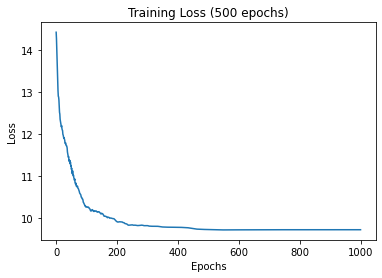

In [17]:
custom_logistic, custom_losses = fit_model(X_train, y_train_cust, J=len(np.unique(labels)), lr=0.0001, epochs=1000, lr_decay=0.99)

plt.plot(range(len(custom_losses)), custom_losses)
# remove gridlines
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss (500 epochs)')
plt.show()


In [18]:

lr_values = [0.00001, 0.0001, 0.001] 
epoch_values = [100, 500, 1000]
lr_decay_values = [0.99, 0.999, 0.9999, 0.99999, 1]
lbd_values = [0, 0.01, 0.1, 1] # regularization parameter

# use grid search to find best hyperparameters
best_acc = -np.inf
best_lr = None
best_epochs = None
best_lbd = None

results_df = pd.DataFrame(columns=['lr', 'epochs', 'lr_decay', 'lbd', 'val_acc', 'trn_loss'])


for lr in lr_values:
    for epochs in epoch_values:
        for lr_decay in lr_decay_values:
            for lbd in lbd_values:
                weights, losses = fit_model(X_train, y_train_cust, J=len(np.unique(labels)), lr=lr, epochs=epochs, lr_decay=lr_decay, lbd=lbd)
                val_acc = np.mean(y_val_cust == predict(X_val, weights)) 
                # add to dataframe, hide errors
                results_df = results_df.append({'lr': lr, 'epochs': epochs, 'lr_decay': lr_decay, 'lbd': lbd, 'val_acc': val_acc, 'trn_loss': losses[-1]}, ignore_index=True)
                if best_acc < val_acc:
                    best_acc = val_acc
                    best_lr = lr
                    best_epochs = epochs
                    best_lr_decay = lr_decay
                    best_lbd = lbd
            


100%|██████████| 1000/1000 [00:01<00:00, 785.67it/s]


In [19]:
print('Best lr: ', best_lr)
print('Best epochs: ', best_epochs)
print('Best lr_decay: ', best_lr_decay)
print('Best val_acc: ', best_acc)
print('Best lbd: ', best_lbd)
print('Training Accuracy: ', np.mean(y_train_cust == predict(X_train, weights)))
print('Validation Accuracy: ', np.mean(y_val_cust == predict(X_val, weights)))
print('Test Accuracy: ', np.mean(y_test_cust == predict(X_test, weights)))

# train model with best hyperparameters
best_weights, best_losses = fit_model(X_train, y_train_cust, J=len(np.unique(labels)), lr=best_lr, epochs=best_epochs, lr_decay=best_lr_decay, lbd=best_lbd)

# plt.plot(range(len(best_losses)), best_losses)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title(f'Training Loss {best_epochs} epochs, lr={best_lr}, lr_decay={best_lr_decay}')
# plt.show()


Best lr:  0.001
Best epochs:  100
Best lr_decay:  0.99
Best val_acc:  0.6625766871165644
Best lbd:  0.01
Training Accuracy:  0.6579854461891995
Validation Accuracy:  0.5950920245398773
Test Accuracy:  0.6269113149847095


100%|██████████| 100/100 [00:00<00:00, 625.35it/s]


Confusion Matrix: 
 [[389 213  65  86]
 [118 399 123  99]
 [ 45  59 237  37]
 [ 46  21  50 624]]
Accuracy:  0.6315587897357334


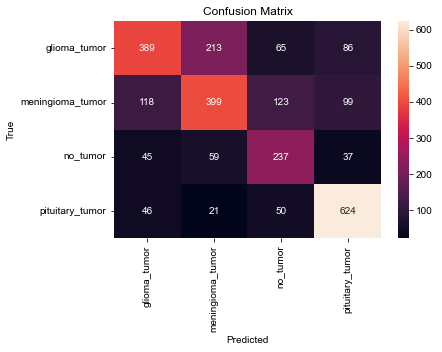

Confusion Matrix: 
 [[39 23  8 11]
 [19 45 29 14]
 [10  9 32 10]
 [ 6  4  3 64]]
Accuracy:  0.5521472392638037


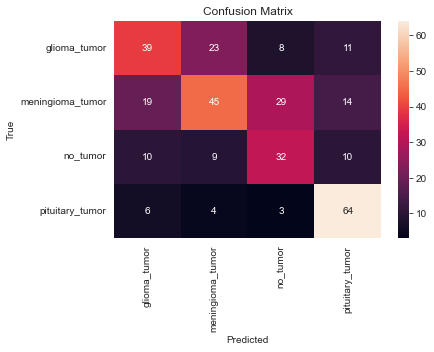

Confusion Matrix: 
 [[35 28 17 12]
 [15 47 21  8]
 [ 5 10 30 16]
 [ 7  5  4 67]]
Accuracy:  0.5474006116207951


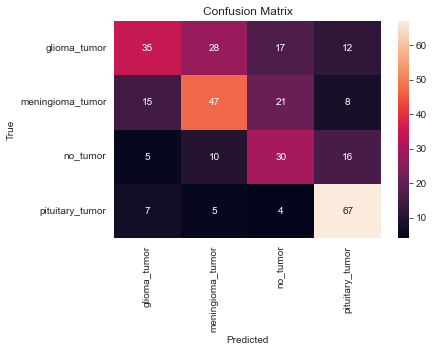

In [20]:
evaluate_model(best_weights, X_train, y_train_cust)
evaluate_model(best_weights, X_val, y_val_cust)
evaluate_model(best_weights, X_test, y_test_cust)

## Hyper-Parameter Tuning

## SVM 

Hyper-Parameters:
- C (regularization parameter): [0.1, 1, 10, 100] - default = 1.0
- kernel (kernel type): ['linear', 'poly', 'rbf', 'sigmoid'] - default = 'rbf'
- gamma (kernel coefficient): ['scale', 'auto', 0.1, 1, 10] - default = 'scale'
  


C:  0.1 Accuracy:  0.6134969325153374
C:  1 Accuracy:  0.8466257668711656
C:  10 Accuracy:  0.911042944785276
C:  100 Accuracy:  0.9202453987730062
C:  1000 Accuracy:  0.9233128834355828
C:  0.1 Accuracy:  0.6134969325153374
C:  1 Accuracy:  0.8466257668711656
C:  10 Accuracy:  0.911042944785276
C:  100 Accuracy:  0.9202453987730062
C:  1000 Accuracy:  0.9233128834355828


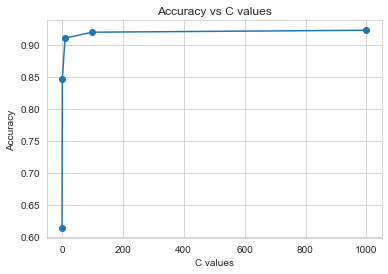

Best C value:  1000
Training accuracy of best C SVM:  0.9992340099578706
Test accuracy of best C SVM:  0.9143730886850153
Validation accuracy of best C SVM:  0.9233128834355828


In [21]:
c_values = [0.1, 1, 10, 100, 1000]
svm_c_acc = []
for c in c_values:
    svm = SVC(C=c)
    svm.fit(X_train, y_train)
    score = svm.score(X_val, y_val)
    svm_c_acc.append(score)
    print('C: ', c, 'Accuracy: ', score)


svm_best_c = c_values[np.argmax(svm_c_acc)]
# print the prediction accuracy on the validation set for each C value
for c, acc in zip(c_values, svm_c_acc):
    print('C: ', c, 'Accuracy: ', acc)

# plot the accuracy vs C values, use dots instead of lines
plt.plot(c_values, svm_c_acc, 'o-')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C values')
plt.show()
print('Best C value: ', svm_best_c)

svm = SVC(C=svm_best_c)
svm.fit(X_train, y_train)
trn_acc_best_c_svm = svm.score(X_train, y_train)
tst_acc_best_c_svm = svm.score(X_test, y_test)
val_acc_best_c_svm = svm.score(X_val, y_val)

print('Training accuracy of best C SVM: ', trn_acc_best_c_svm)
print('Test accuracy of best C SVM: ', tst_acc_best_c_svm)
print('Validation accuracy of best C SVM: ', val_acc_best_c_svm)


Kernel:  rbf
Kernel:  rbf Accuracy:  0.9233128834355828
Kernel:  rbf Accuracy:  0.9233128834355828


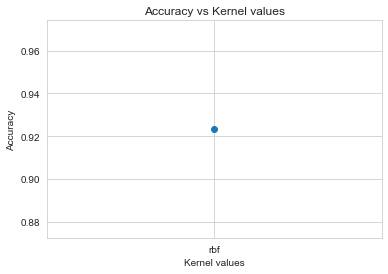

Best kernel value:  rbf
Training accuracy of best kernel SVM:  0.9992340099578706
Test accuracy of best kernel SVM:  0.9143730886850153
Validation accuracy of best kernel SVM:  0.9233128834355828


In [22]:
svm_kernel_acc = []
# kernel_values = ['linear', 'sigmoid']
kernel_values = ['rbf']
for kernel in kernel_values:
    print('Kernel: ', kernel)
    svm = SVC(kernel=kernel, C=svm_best_c)
    svm.fit(X_train, y_train)
    score = svm.score(X_val, y_val)
    svm_kernel_acc.append(score)
    print('Kernel: ', kernel, 'Accuracy: ', score)

svm_best_kernel = kernel_values[np.argmax(svm_kernel_acc)]
for kernel, acc in zip(kernel_values, svm_kernel_acc):
    print('Kernel: ', kernel, 'Accuracy: ', acc)

plt.plot(kernel_values, svm_kernel_acc, 'o-')
plt.xlabel('Kernel values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Kernel values')
plt.show()

print('Best kernel value: ', svm_best_kernel)

svm = SVC(kernel=svm_best_kernel, C=svm_best_c)
svm.fit(X_train, y_train)
trn_acc_best_kernel_svm = svm.score(X_train, y_train)
tst_acc_best_kernel_svm = svm.score(X_test, y_test)
val_acc_best_kernel_svm = svm.score(X_val, y_val)

print('Training accuracy of best kernel SVM: ', trn_acc_best_kernel_svm)
print('Test accuracy of best kernel SVM: ', tst_acc_best_kernel_svm)
print('Validation accuracy of best kernel SVM: ', val_acc_best_kernel_svm)



Gamma:  scale
Gamma:  scale Accuracy:  0.9233128834355828
Gamma:  auto
Gamma:  auto Accuracy:  0.41411042944785276
Gamma:  0.1
Gamma:  0.1 Accuracy:  0.41411042944785276
Gamma:  1
Gamma:  1 Accuracy:  0.41411042944785276
Gamma:  10
Gamma:  10 Accuracy:  0.41411042944785276
Gamma:  scale Accuracy:  0.9233128834355828
Gamma:  auto Accuracy:  0.41411042944785276
Gamma:  0.1 Accuracy:  0.41411042944785276
Gamma:  1 Accuracy:  0.41411042944785276
Gamma:  10 Accuracy:  0.41411042944785276


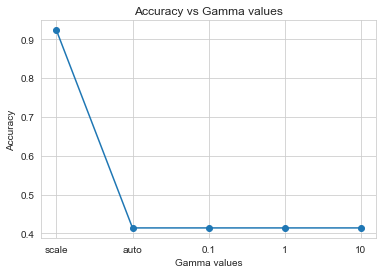

Best gamma value:  scale
Training accuracy of best gamma SVM:  0.9992340099578706
Test accuracy of best gamma SVM:  0.9143730886850153
Validation accuracy of best gamma SVM:  0.9233128834355828


In [23]:
gamma_values = ['scale', 'auto', 0.1, 1, 10]
svm_gamma_acc = []
for gamma in gamma_values:
    print('Gamma: ', gamma)
    svm = SVC(kernel=svm_best_kernel, C=svm_best_c, gamma=gamma)
    svm.fit(X_train, y_train)
    score = svm.score(X_val, y_val)
    svm_gamma_acc.append(score)
    print('Gamma: ', gamma, 'Accuracy: ', score)

svm_best_gamma = gamma_values[np.argmax(svm_gamma_acc)]
for gamma, acc in zip(gamma_values, svm_gamma_acc):
    print('Gamma: ', gamma, 'Accuracy: ', acc)

plt.plot(gamma_values, svm_gamma_acc, 'o-')
plt.xlabel('Gamma values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma values')
plt.show()

print('Best gamma value: ', svm_best_gamma)

svm = SVC(kernel=svm_best_kernel, C=svm_best_c, gamma=svm_best_gamma)
svm.fit(X_train, y_train)
trn_acc_best_gamma_svm = svm.score(X_train, y_train)
tst_acc_best_gamma_svm = svm.score(X_test, y_test)
val_acc_best_gamma_svm = svm.score(X_val, y_val)

print('Training accuracy of best gamma SVM: ', trn_acc_best_gamma_svm)
print('Test accuracy of best gamma SVM: ', tst_acc_best_gamma_svm)
print('Validation accuracy of best gamma SVM: ', val_acc_best_gamma_svm)


### LogisticRegression

Hyper-Parameters:
- C (inverse of regularization strength): [0.1, 1, 10, 100] - default = 1.0
- penalty (type of regularization): ['l2', 'none'] - default = 'l2'
- max_iter (maximum number of iterations): [100, 1000, 10000, 100000, 1000000] - default = 100
- solver (algorithm for optimization problem): ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'] - default = 'lbfgs'

Max iter:  100


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max iter:  100 Accuracy:  0.6901840490797546
Max iter:  1000
Max iter:  1000 Accuracy:  0.6932515337423313
Max iter:  10000
Max iter:  10000 Accuracy:  0.6932515337423313
Max iter:  100000
Max iter:  100000 Accuracy:  0.6932515337423313
Max iter:  1000000
Max iter:  1000000 Accuracy:  0.6932515337423313
Max iter:  100 Accuracy:  0.6901840490797546
Max iter:  1000 Accuracy:  0.6932515337423313
Max iter:  10000 Accuracy:  0.6932515337423313
Max iter:  100000 Accuracy:  0.6932515337423313
Max iter:  1000000 Accuracy:  0.6932515337423313


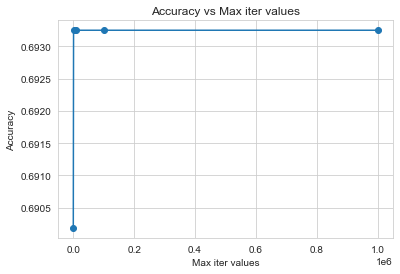

Best max iter value:  1000
Training accuracy of best max iter Logistic Regression:  0.7755649176560705
Test accuracy of best max iter Logistic Regression:  0.6758409785932722
Validation accuracy of best max iter Logistic Regression:  0.6932515337423313


In [24]:
max_iter_values = [100, 1000, 10000, 100000, 1000000]
log_max_iter_acc = []
for max_iter in max_iter_values:
    print('Max iter: ', max_iter)
    log = LogisticRegression(max_iter=max_iter)
    log.fit(X_train, y_train)
    score = log.score(X_val, y_val)
    log_max_iter_acc.append(score)
    print('Max iter: ', max_iter, 'Accuracy: ', score)

log_best_max_iter = max_iter_values[np.argmax(log_max_iter_acc)]
for max_iter, acc in zip(max_iter_values, log_max_iter_acc):
    print('Max iter: ', max_iter, 'Accuracy: ', acc)

plt.plot(max_iter_values, log_max_iter_acc, 'o-')
plt.xlabel('Max iter values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max iter values')
plt.show()

print('Best max iter value: ', log_best_max_iter)

log = LogisticRegression(max_iter=log_best_max_iter)
log.fit(X_train, y_train)
trn_acc_best_max_iter_log = log.score(X_train, y_train)
tst_acc_best_max_iter_log = log.score(X_test, y_test)
val_acc_best_max_iter_log = log.score(X_val, y_val)

print('Training accuracy of best max iter Logistic Regression: ', trn_acc_best_max_iter_log)
print('Test accuracy of best max iter Logistic Regression: ', tst_acc_best_max_iter_log)
print('Validation accuracy of best max iter Logistic Regression: ', val_acc_best_max_iter_log)




C:  0.1
C:  0.1 Accuracy:  0.6932515337423313
C:  1
C:  1 Accuracy:  0.6932515337423313
C:  10
C:  10 Accuracy:  0.696319018404908
C:  100
C:  100 Accuracy:  0.696319018404908
C:  1000
C:  1000 Accuracy:  0.6932515337423313
C:  0.1 Accuracy:  0.6932515337423313
C:  1 Accuracy:  0.6932515337423313
C:  10 Accuracy:  0.696319018404908
C:  100 Accuracy:  0.696319018404908
C:  1000 Accuracy:  0.6932515337423313


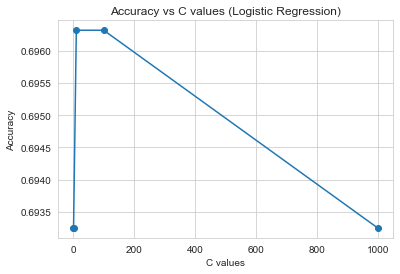

Best C value:  10
Training accuracy of best C Logistic Regression:  0.7759479126771351
Test accuracy of best C Logistic Regression:  0.6758409785932722
Validation accuracy of best C Logistic Regression:  0.696319018404908


In [25]:
c_values = [0.1, 1, 10, 100, 1000]
log_c_acc = []
for c in c_values:
    print('C: ', c)
    log = LogisticRegression(C=c, max_iter=log_best_max_iter)
    log.fit(X_train, y_train)
    score = log.score(X_val, y_val)
    log_c_acc.append(score)
    print('C: ', c, 'Accuracy: ', score)

log_best_c = c_values[np.argmax(log_c_acc)]
for c, acc in zip(c_values, log_c_acc):
    print('C: ', c, 'Accuracy: ', acc)

plt.plot(c_values, log_c_acc, 'o-')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C values (Logistic Regression)')
plt.show()

print('Best C value: ', log_best_c)

log = LogisticRegression(C=log_best_c, max_iter=log_best_max_iter)
log.fit(X_train, y_train)
trn_acc_best_c_log = log.score(X_train, y_train)
tst_acc_best_c_log = log.score(X_test, y_test)
val_acc_best_c_log = log.score(X_val, y_val)

print('Training accuracy of best C Logistic Regression: ', trn_acc_best_c_log)
print('Test accuracy of best C Logistic Regression: ', tst_acc_best_c_log)
print('Validation accuracy of best C Logistic Regression: ', val_acc_best_c_log)


Penalty:  l2
Penalty:  l2 Accuracy:  0.696319018404908
Penalty:  none


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Penalty:  none Accuracy:  0.6932515337423313
Penalty:  l2 Accuracy:  0.696319018404908
Penalty:  none Accuracy:  0.6932515337423313


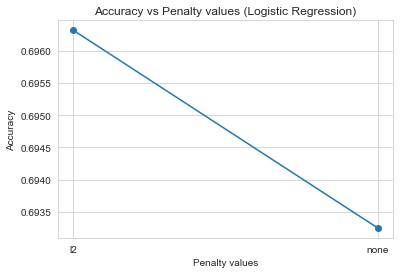

Best penalty value:  l2
Training accuracy of best penalty Logistic Regression:  0.7759479126771351
Test accuracy of best penalty Logistic Regression:  0.6758409785932722
Validation accuracy of best penalty Logistic Regression:  0.696319018404908


In [26]:
penalty_values = ['l2', 'none']
log_penalty_acc = []
for penalty in penalty_values:
    print('Penalty: ', penalty)
    log = LogisticRegression(C=log_best_c, penalty=penalty, max_iter=log_best_max_iter)
    log.fit(X_train, y_train)
    score = log.score(X_val, y_val)
    log_penalty_acc.append(score)
    print('Penalty: ', penalty, 'Accuracy: ', score)

log_best_penalty = penalty_values[np.argmax(log_penalty_acc)]
for penalty, acc in zip(penalty_values, log_penalty_acc):
    print('Penalty: ', penalty, 'Accuracy: ', acc)

plt.plot(penalty_values, log_penalty_acc, 'o-')
plt.xlabel('Penalty values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Penalty values (Logistic Regression)')
plt.show()

print('Best penalty value: ', log_best_penalty)

log = LogisticRegression(C=log_best_c, penalty=log_best_penalty, max_iter=log_best_max_iter)
log.fit(X_train, y_train)
trn_acc_best_penalty_log = log.score(X_train, y_train)
tst_acc_best_penalty_log = log.score(X_test, y_test)
val_acc_best_penalty_log = log.score(X_val, y_val)

print('Training accuracy of best penalty Logistic Regression: ', trn_acc_best_penalty_log)
print('Test accuracy of best penalty Logistic Regression: ', tst_acc_best_penalty_log)
print('Validation accuracy of best penalty Logistic Regression: ', val_acc_best_penalty_log)


Solver:  newton-cg


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Solver:  newton-cg Accuracy:  0.6901840490797546
Solver:  lbfgs
Solver:  lbfgs Accuracy:  0.6901840490797546
Solver:  liblinear


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver:  liblinear Accuracy:  0.6932515337423313
Solver:  sag
Solver:  sag Accuracy:  0.6901840490797546
Solver:  saga


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver:  saga Accuracy:  0.6932515337423313
Solver:  newton-cg Accuracy:  0.6901840490797546
Solver:  lbfgs Accuracy:  0.6901840490797546
Solver:  liblinear Accuracy:  0.6932515337423313
Solver:  sag Accuracy:  0.6901840490797546
Solver:  saga Accuracy:  0.6932515337423313


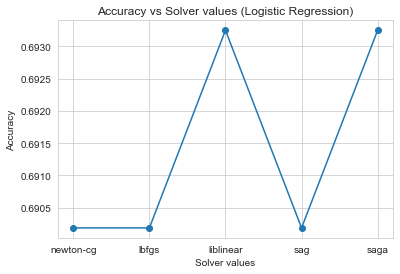

Best solver value:  liblinear
Training accuracy of best solver Logistic Regression:  0.7633090769819992
Test accuracy of best solver Logistic Regression:  0.7003058103975535
Validation accuracy of best solver Logistic Regression:  0.6932515337423313


/Users/mateen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
log_solver_acc = []
for solver in solver_values:
    print('Solver: ', solver)
    log = LogisticRegression(C=log_best_c, penalty=log_best_penalty, solver=solver)
    log.fit(X_train, y_train)
    score = log.score(X_val, y_val)
    log_solver_acc.append(score)
    print('Solver: ', solver, 'Accuracy: ', score)

log_best_solver = solver_values[np.argmax(log_solver_acc)]
for solver, acc in zip(solver_values, log_solver_acc):
    print('Solver: ', solver, 'Accuracy: ', acc)

plt.plot(solver_values, log_solver_acc, 'o-')
plt.xlabel('Solver values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver values (Logistic Regression)')
plt.show()

print('Best solver value: ', log_best_solver)

log = LogisticRegression(C=log_best_c, penalty=log_best_penalty, solver=log_best_solver)
log.fit(X_train, y_train)
trn_acc_best_solver_log = log.score(X_train, y_train)
tst_acc_best_solver_log = log.score(X_test, y_test)
val_acc_best_solver_log = log.score(X_val, y_val)

print('Training accuracy of best solver Logistic Regression: ', trn_acc_best_solver_log)
print('Test accuracy of best solver Logistic Regression: ', tst_acc_best_solver_log)
print('Validation accuracy of best solver Logistic Regression: ', val_acc_best_solver_log)


## Report of accuracy after Hyper-Parameter Tuning

In [28]:
# summarize best values for both SVM and Logistic Regression
print('SVM Parameters')
print('Best kernel: ', svm_best_kernel)
print('Best C value: ', svm_best_c)
print('Best gamma value: ', svm_best_gamma)
print('Training accuracy of best SVM: ', trn_acc_best_gamma_svm)
print('Test accuracy of best SVM: ', tst_acc_best_gamma_svm)
print('Validation accuracy of best SVM: ', val_acc_best_gamma_svm)
print('---------------------------------')
print('Logistic Regression Parameters')
print('Best max_iter value: ', log_best_max_iter)
print('Best C value: ', log_best_c)
print('Best penalty value: ', log_best_penalty)
print('Best solver value: ', log_best_solver)
print('Training accuracy of best Logistic Regression: ', trn_acc_best_solver_log)
print('Test accuracy of best Logistic Regression: ', tst_acc_best_solver_log)
print('Validation accuracy of best Logistic Regression: ', val_acc_best_solver_log)
print('---------------------------------')
print('Custom Logistic Regression Parameters')
print('Best lr: ', best_lr)
print('Best epochs: ', best_epochs)
print('Best lr_decay: ', best_lr_decay)
print('Best lbd: ', best_lbd)
print('Best val_acc: ', best_acc)
print('Training Accuracy: ', np.mean(y_train_cust == predict(X_train, weights)))
print('Validation Accuracy: ', np.mean(y_val_cust == predict(X_val, weights)))
print('Test Accuracy: ', np.mean(y_test_cust == predict(X_test, weights)))


SVM Parameters
Best kernel:  rbf
Best C value:  1000
Best gamma value:  scale
Training accuracy of best SVM:  0.9992340099578706
Test accuracy of best SVM:  0.9143730886850153
Validation accuracy of best SVM:  0.9233128834355828
---------------------------------
Logistic Regression Parameters
Best max_iter value:  1000
Best C value:  10
Best penalty value:  l2
Best solver value:  liblinear
Training accuracy of best Logistic Regression:  0.7633090769819992
Test accuracy of best Logistic Regression:  0.7003058103975535
Validation accuracy of best Logistic Regression:  0.6932515337423313
---------------------------------
Custom Logistic Regression Parameters
Best lr:  0.001
Best epochs:  100
Best lr_decay:  0.99
Best lbd:  0.01
Best val_acc:  0.6625766871165644
Training Accuracy:  0.6579854461891995
Validation Accuracy:  0.5950920245398773
Test Accuracy:  0.6269113149847095


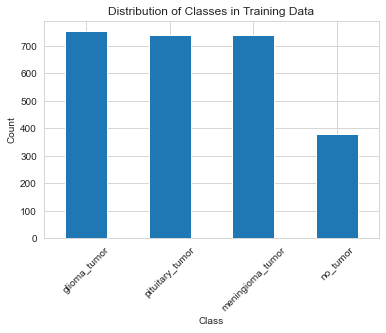

In [29]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Analysis


- Based on the results above, the Support Vector Machine (SVM) classifier performs better than the Logistic Regression Classifiers. The SVM has higher training, test, and validation accuracies compared to Logistic Regression Models. This indicates that SVM is better at generalizing the data and is less prone to overfitting.
- Strategies for further improvement:
  - Data augmentation: We can use data augmentation to increase the size of our dataset. Data augmentation involves generating new images through different transformations such as rotation, scaling, and flipping. This increases the amount of data available to train the model, and improves the model's ability to generalize for unseen data. Data augmentation improves classifier robustness, which would likely improve the test and validation accuracy of our models (currently, they tend to overfit the training data to some extent).
  - Full Grid Search for hyperparameter tuning: Due to time and compute constraints, we were not able to perform a full grid search for hyperparameter tuning. A full search would involve testing all possible combinations of hyperparameters, and selecting the combination that yields the best results. This would likely improve the accuracy of our models, as we would be able to find the optimal hyperparameters for each model. Our current methods don't account for interactions between hyperparameters, so we may be missing out on some optimal combinations.